<a href="https://colab.research.google.com/github/qnrua0511/bikeseoul/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#설치후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,705 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121926 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [1]:
import pandas as pd

In [3]:
usage_12=pd.read_csv('usage_12.csv')

In [4]:
usage_12.head()

,대여년월,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,202312,102,망원역 1번출구 앞,일일권,20대,38,2338.03,23.61,101761.54,1414
1,202312,102,망원역 1번출구 앞,일일권,30대,20,1272.34,10.82,51448.03,490
2,202312,102,망원역 1번출구 앞,일일권,40대,3,149.55,1.39,5993.29,42
3,202312,102,망원역 1번출구 앞,일일권,60대,1,121.97,1.62,7000.00,51
4,202312,102,망원역 1번출구 앞,일일권,~10대,1,44.26,0.48,2070.00,16


In [5]:
rental_shop_add=pd.read_csv('rental_shop_add.csv')

In [6]:
rental_shop_add.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100


In [7]:
merged_df = usage_12.merge(rental_shop_add[['대여소번호', '자치구']], on='대여소번호', how='left')
usage_12['자치구'] = merged_df['자치구']
usage_12.head()

,대여년월,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구
0,202312,102,망원역 1번출구 앞,일일권,20대,38,2338.03,23.61,101761.54,1414,마포구
1,202312,102,망원역 1번출구 앞,일일권,30대,20,1272.34,10.82,51448.03,490,마포구
2,202312,102,망원역 1번출구 앞,일일권,40대,3,149.55,1.39,5993.29,42,마포구
3,202312,102,망원역 1번출구 앞,일일권,60대,1,121.97,1.62,7000.00,51,마포구
4,202312,102,망원역 1번출구 앞,일일권,~10대,1,44.26,0.48,2070.00,16,마포구


In [8]:
region_usage=pd.DataFrame(usage_12.groupby('자치구').이용건수.sum()).reset_index()

In [9]:
region_usage

,자치구,이용건수
0,강남구,63129
1,강동구,87333
2,강북구,30978
3,강서구,272404
4,관악구,48019
5,광진구,101353
6,구로구,85072
7,금천구,38275
8,노원구,133657
9,도봉구,45997


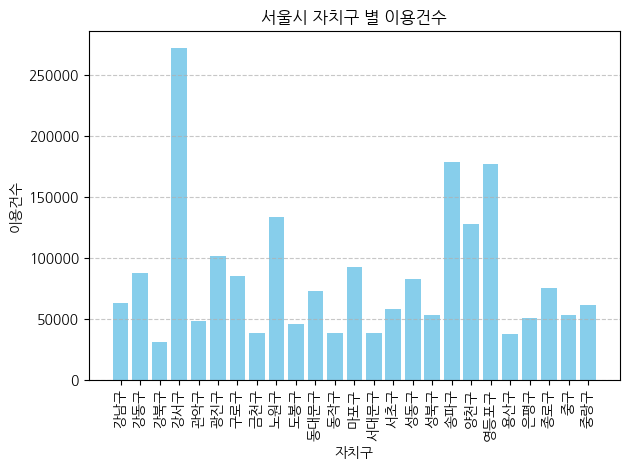

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.bar(region_usage['자치구'], region_usage['이용건수'], color='skyblue')
plt.xlabel('자치구')
plt.ylabel('이용건수')
plt.title('서울시 자치구 별 이용건수')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

12월 달에 강서구에서 가장 많은 이용이 있었다는 것을 확인할 수 있음

In [23]:
age_usage=pd.DataFrame(usage_12.groupby('연령대코드').이용건수.sum()).reset_index()

In [24]:
age_usage

,연령대코드,이용건수
0,20대,649498
1,30대,503635
2,40대,330090
3,50대,231530
4,60대,79070
5,70대이상,11829
6,~10대,148429
7,기타,150361


In [25]:
age_usage_10=age_usage.iloc[6]
age_usage=age_usage.drop(index=6)
age_usage= pd.concat([age_usage.iloc[:0], age_usage_10.to_frame().T, age_usage.iloc[0:]]).reset_index(drop=True)

In [26]:
age_usage

,연령대코드,이용건수
0,~10대,148429
1,20대,649498
2,30대,503635
3,40대,330090
4,50대,231530
5,60대,79070
6,70대이상,11829
7,기타,150361


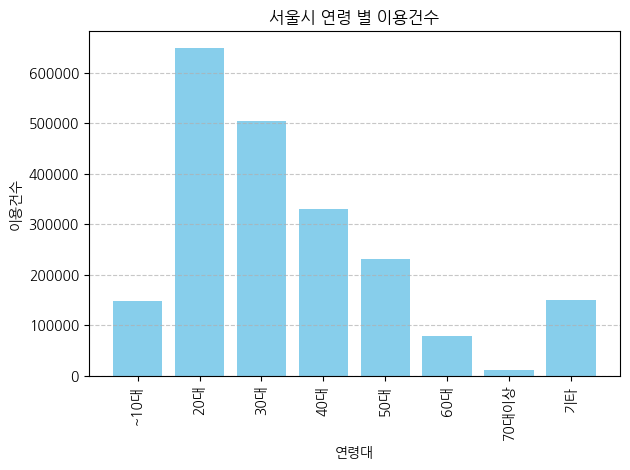

In [27]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.bar(age_usage['연령대코드'], age_usage['이용건수'], color='skyblue')
plt.xlabel('연령대')
plt.ylabel('이용건수')
plt.title('서울시 연령 별 이용건수')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

20대와 30대의 이용량이 가장 많음

기타는 외국인, 비회원 등을 의미함

In [28]:
hour_usage=pd.read_csv('hour_usage.csv')

In [29]:
hour_usage.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리
0,2023-12-01,0,3517,용마사거리,정기권,~10대,1,6.88,0.40,1738.19
1,2023-12-01,0,1569,수유역2번출구,정기권,~10대,1,78.37,0.61,2638.76
2,2023-12-01,0,736,오솔길공원,정기권,20대,1,40.91,0.32,1377.52
3,2023-12-01,0,740,으뜸공원,정기권,20대,1,90.50,0.53,2285.26
4,2023-12-01,0,505,자양사거리 광진아크로텔 앞,정기권,20대,1,21.38,0.21,900.00


In [31]:
h_u=(hour_usage.groupby('대여시간').이용건수.sum()).reset_index()
h_u

,대여시간,이용건수
0,0,47217
1,1,34195
2,2,23750
3,3,16953
4,4,13565
5,5,22585
6,6,46972
7,7,108685
8,8,174836
9,9,98032


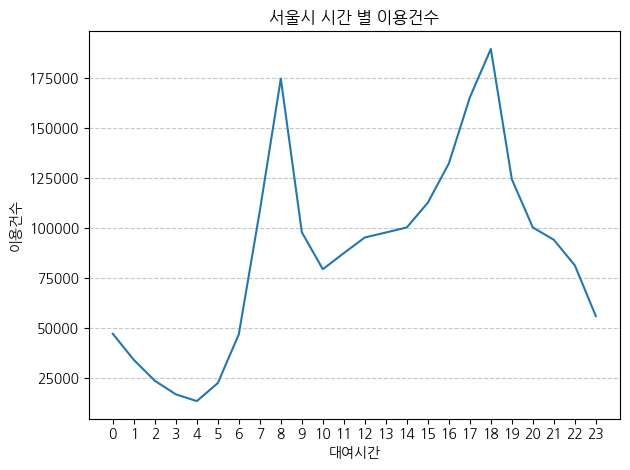

In [37]:
import matplotlib.pyplot as plt

plt.plot(h_u['대여시간'], h_u['이용건수'])
plt.xlabel('대여시간')
plt.ylabel('이용건수')
plt.title('서울시 시간 별 이용건수')
plt.xticks(h_u['대여시간'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8시와 18시의 값이 큰 것을 보아 출퇴근 시간에 많이 이용하는 것을 알 수 있음

출퇴근 시간에 많이 이용하는 것을 보아 지하철역, 학교, 회사 근처에서 많이 이용할 것이라고 예상됨